#1. Potential Temperature
[with mpcalc.potential_temperature](https://geocat-examples.readthedocs.io/en/latest/gallery/Panels/NCL_panel_14.html#sphx-glr-gallery-panels-ncl-panel-14-py)

# 1. Potential Temperature

### 1. combining two sets of paneled plots
### 2. adding a common color bar to paneled plots
### 3. reversing the y axis
### 4. setting custom scales.

In [1]:
# import packages
from matplotlib.ticker import FixedLocator
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

import numpy as np
import xarray as xr
import cmaps

import geocat.datafiles as gdf # 예제 제공
import geocat.viz as gv # 시각화 라이브러리

In [3]:
# add import package
import gsw

In [4]:
# open and ensure longitude range from 0 to 360
ds = xr.open_dataset(gdf.get("netcdf_files/h_avg_Y0191_D000.00.nc"), decode_times = False)

# geocat.viz.xr_add_cyclic_longitudes(da, coord)
T_pot = gv.xr_add_cyclic_longitudes(ds.T, "lon_t") # potential temp
s = gv.xr_add_cyclic_longitudes(ds.S,"lon_t") # salinity

In [6]:
# 1. 전체 데이터셋 구조 확인
print(ds)
print("\n" + "="*50 + "\n")

<xarray.Dataset> Size: 13MB
Dimensions:           (lon_t: 102, lon_u: 102, lat_t: 116, lat_u: 116, z_t: 25,
                       z_w: 26, time: 1, d2: 2, islands: 8, basins: 15,
                       engterm: 9, ttnterm1: 8, ttnterm2: 4, tracers: 4,
                       ifdefs: 30, clev: 4)
Coordinates:
  * lon_t             (lon_t) float32 408B -1.8 1.8 5.4 ... 354.6 358.2 361.8
  * lon_u             (lon_u) float32 408B 0.0 3.6 7.2 ... 356.4 360.0 363.6
  * lat_t             (lat_t) float32 464B -78.93 -77.08 -75.24 ... 88.15 90.0
  * lat_u             (lat_u) float32 464B -78.01 -76.16 -74.32 ... 89.08 90.92
  * z_t               (z_t) float32 100B 600.0 1.998e+03 ... 4.33e+05 4.775e+05
  * z_w               (z_w) float32 104B 0.0 1.2e+03 ... 4.551e+05 5e+05
  * time              (time) float64 8B 6.972e+04
Dimensions without coordinates: d2, islands, basins, engterm, ttnterm1,
                                ttnterm2, tracers, ifdefs, clev
Data variables: (12/66)
    daypyr   

In [7]:
print(T)

<xarray.DataArray (time: 1, z_t: 25, lat_t: 116, lon_t: 103)> Size: 1MB
array([[[[       nan,        nan,        nan, ...,        nan,
                 nan,        nan],
         [       nan,        nan,        nan, ...,        nan,
                 nan,        nan],
         [       nan,        nan,        nan, ...,        nan,
                 nan,        nan],
         ...,
         [-1.7882857, -1.7861546, -1.7824272, ..., -1.7882857,
          -1.7861546, -1.7882857],
         [-1.7796832, -1.7767931, -1.7740209, ..., -1.7796832,
          -1.7767931, -1.7796832],
         [-1.7876291, -1.7876291, -1.7876291, ..., -1.7876291,
          -1.7876291, -1.7876291]],

        [[       nan,        nan,        nan, ...,        nan,
                 nan,        nan],
         [       nan,        nan,        nan, ...,        nan,
                 nan,        nan],
         [       nan,        nan,        nan, ...,        nan,
                 nan,        nan],
...
                 nan,     

In [8]:
# 3. 데이터셋 변수 확인
for var in ds.data_vars:
    print(f"{var}: {ds[var].dims}, shape = {ds[var].shape}")

daypyr: (), shape = ()
time_bound: ('time', 'd2'), shape = (1, 2)
itt: ('time',), shape = (1,)
time_avg_counter: ('time',), shape = (1,)
rmaska: ('lat_t', 'lon_t'), shape = (116, 102)
rmask: ('lat_t', 'lon_t'), shape = (116, 102)
kmt: ('lat_t', 'lon_t'), shape = (116, 102)
islands_label: ('islands',), shape = (8,)
basins_label: ('basins',), shape = (15,)
engterm_label: ('engterm',), shape = (9,)
ttnterm1_label: ('ttnterm1',), shape = (8,)
ttnterm2_label: ('ttnterm2',), shape = (4,)
tracers_label: ('tracers',), shape = (4,)
ifdefs_label: ('ifdefs',), shape = (30,)
dz: ('z_t',), shape = (25,)
dzz: ('z_w',), shape = (26,)
dxt: ('lon_t',), shape = (102,)
dxu: ('lon_u',), shape = (102,)
dyt: ('lat_t',), shape = (116,)
dyu: ('lat_u',), shape = (116,)
tmt: ('time', 'z_w', 'lat_u'), shape = (1, 26, 116)
tmtreg: ('time', 'basins', 'z_w', 'lat_u'), shape = (1, 15, 26, 116)
tmtiso: ('time', 'z_w', 'lat_u'), shape = (1, 26, 116)
tmtisoreg: ('time', 'basins', 'z_w', 'lat_u'), shape = (1, 15, 26, 11

In [9]:
temp_vars = [var for var in ds.data_vars if 'temp' in var.lower() or 'T' in var]
print(temp_vars)

['Tttn_terms', 'Tttn_basins', 'T_horz', 'Tflx', 'T']


In [7]:
# Extract slices of data for each panel
T_N30 = T_pot.isel(time=0).sel(lat_t = 30, lon_t = 180, method = 'nearest')
T_S30 = T_pot.isel(time=0).sel(lat_t = -30, lon_t = 180, method = 'nearest')
S_N30 = s.isel(time=0).sel(lat_t = 30, lon_t = 180, method = 'nearest')
S_S30 = s.isel(time=0).sel(lat_t = -30, lon_t = 180, method = 'nearest')

In [ ]:
# get coordinates
lat1 = float(T_N30.lat_t.values)
print(lat1)

29.14535140991211


In [13]:
lat2 = float(T_S30.lat_t.values)
lon1 = float(T_N30.lon_t.values)
lon2 = float(T_S30.lon_t.values)

In [18]:
# calculate pressure from depth
# z_t unit is cm, so convert to meters, then to dbar (1m = 1dbar)

depth_m = T_N30.z_t.values/100.0
pressure = depth_m / 10.0 #dbar

# convert Sp -> Sa
'''
EXAMPLE:
SP =   [34.5487; 34.7275; 34.8605; 34.6810; 34.5680; 34.5600;]
p =    [     10;      50;     125;     250;     600;    1000;]
lat =  [      4;       4;       4;       4;       4;       4;]
long = [    188;     188;     188;     188;     188;     188;]
If the profile data refers to one location (one station) is it
acceptable to enter the station location once.
(i.e. the following will produce the same result as the input above).
SP =   [34.5487; 34.7275; 34.8605; 34.6810; 34.5680; 34.5600;]
p =    [     10;      50;     125;     250;     600;    1000;]
lat =  4;
long = 188;
[SA, in_ocean] = gsw_SA_from_SP(SP,p,long,lat)
SA =                         in_ocean =
  34.711778344814114              1
  34.891522618230098              1
  35.025544862476920              1
  34.847229026189588              1
  34.736628474576051              1
  34.732363065590846              1
'''
SA1 = gsw.SA_from_SP(S_N30.values, pressure, lon1, lat1)
SA2 = gsw.SA_from_SP(S_S30.values, pressure, lon2, lat2)

In [22]:
# Convert Tp to conservative Temperature
CT1 = gsw.CT_from_pt(SA1, T_N30.values)
CT2 = gsw.CT_from_pt(SA2, T_S30.values)

# calculate in situ-temperature from consertive temperature

T_insitu1 = gsw.t_from_CT(SA1, CT1, pressure)
T_insitu2 = gsw.t_from_CT(SA1, CT2, pressure)

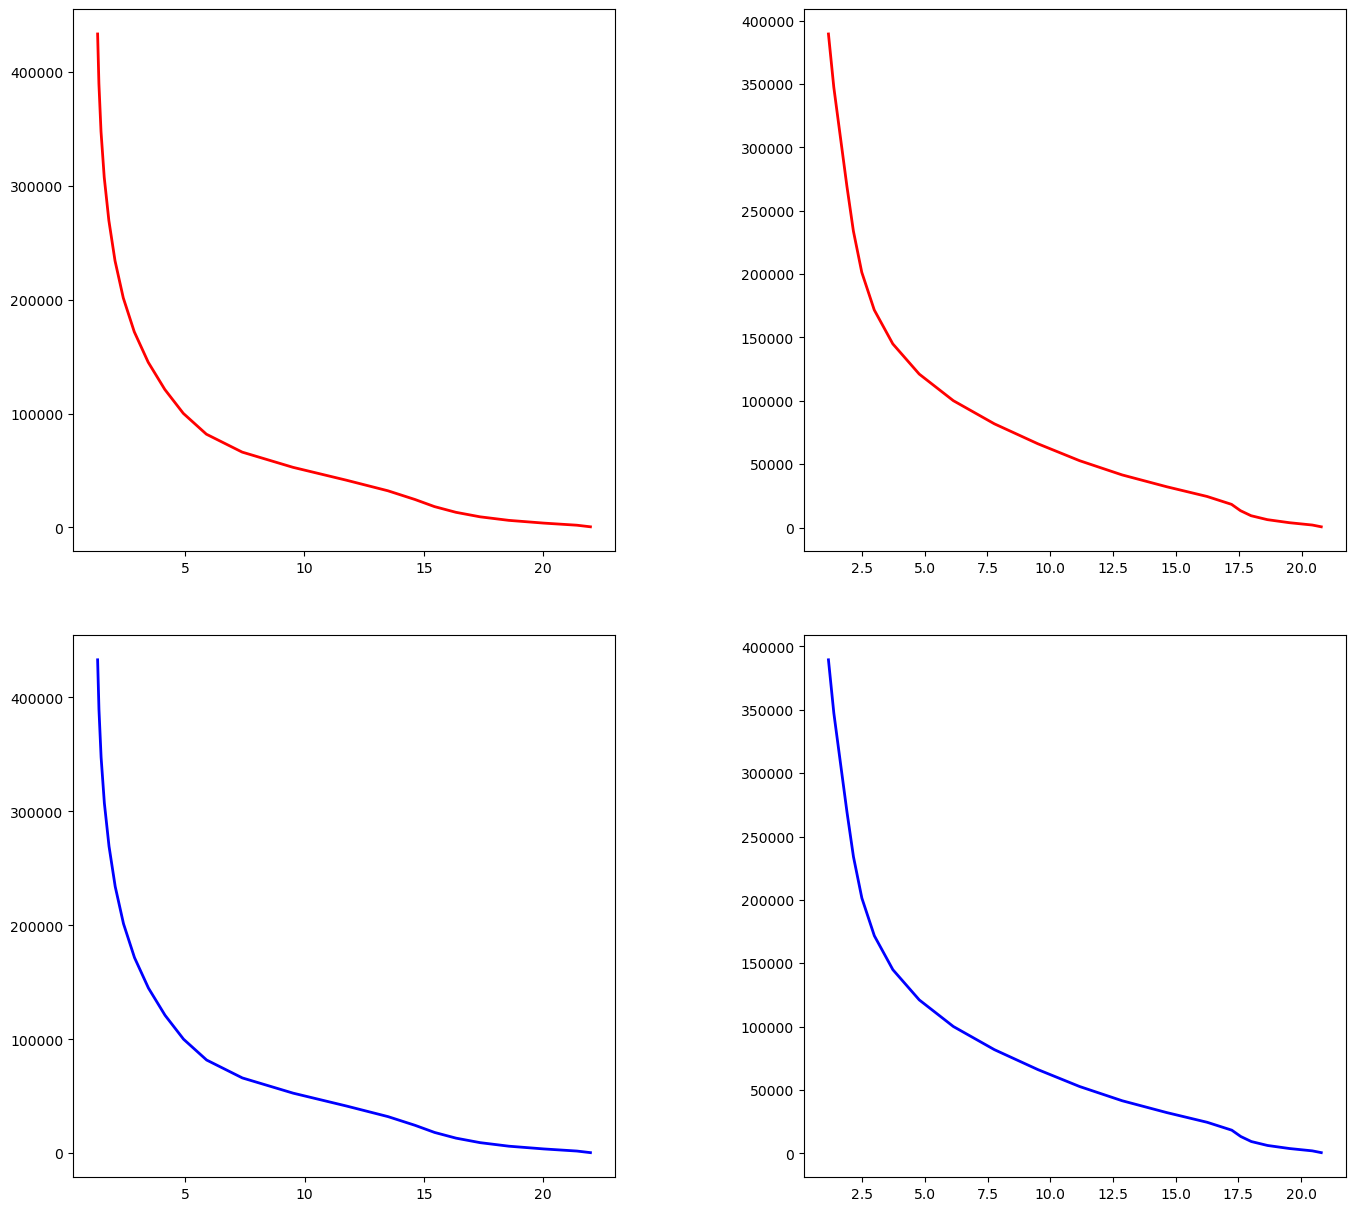

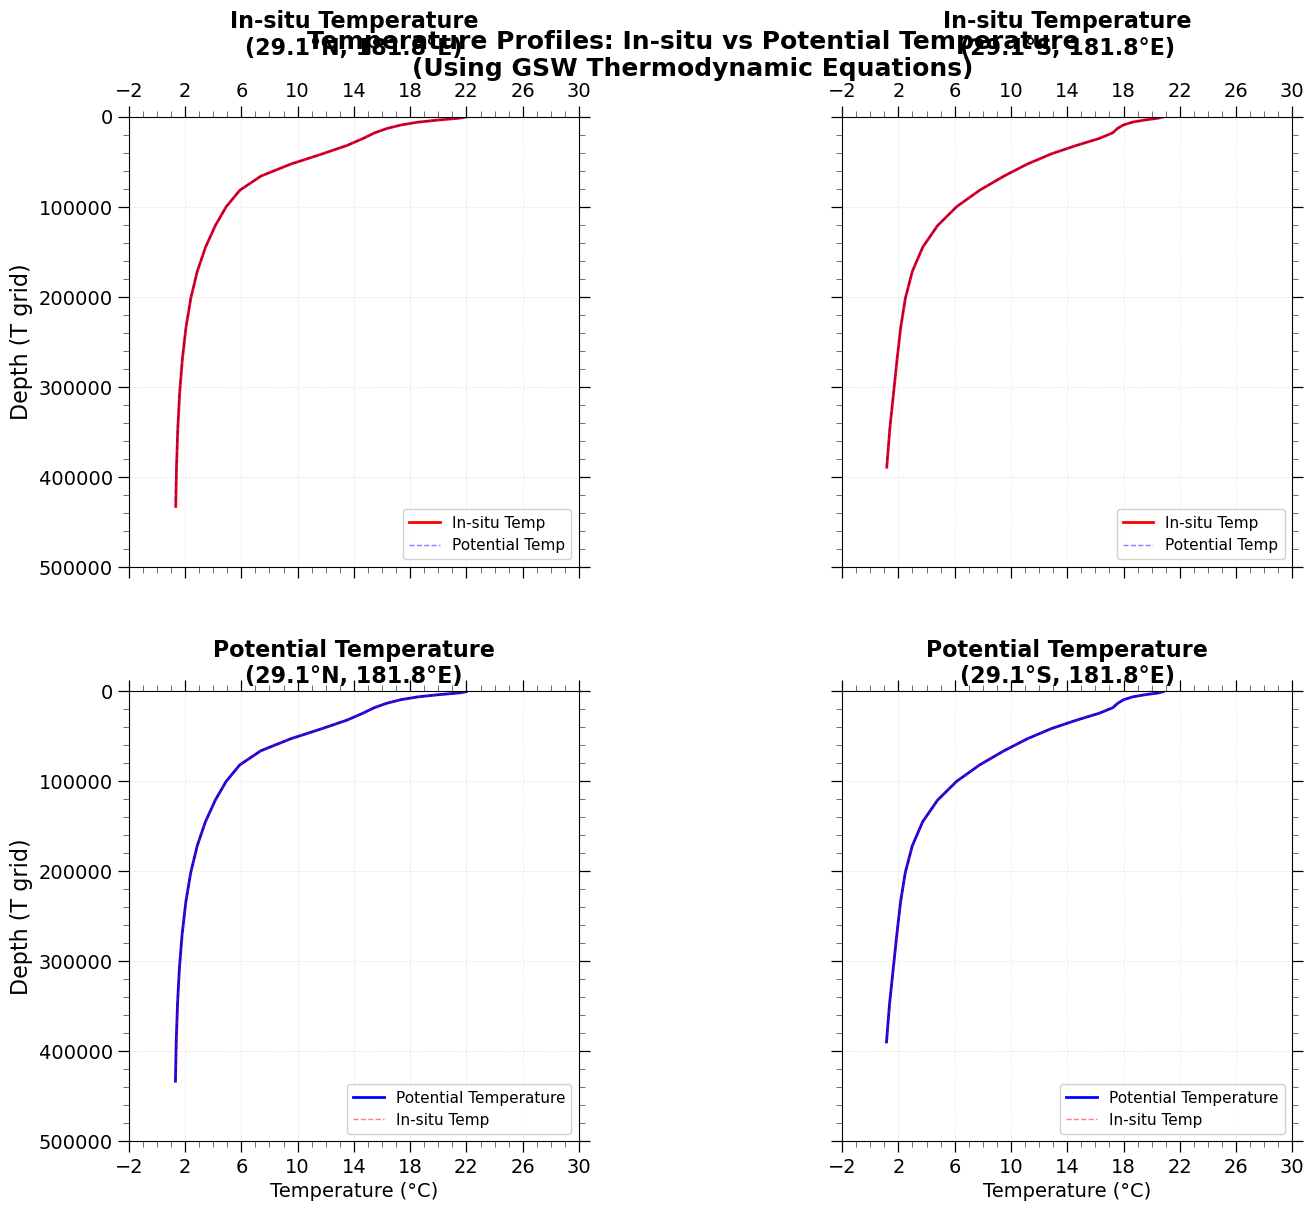

In [33]:
# 그림 그리기
fig = plt.figure(figsize=(14, 12), constrained_layout = True)
spec = gridspec.GridSpec(ncols=2, nrows=2, figure=fig)
fig.set_constrained_layout_pads(hspace=0.1, wspace=0.1)

ax1 = fig.add_subplot(spec[0, 0]) # 30N
ax2 = fig.add_subplot(spec[0, 1]) # 30S
ax3 = fig.add_subplot(spec[1, 0]) # 30N
ax4 = fig.add_subplot(spec[1, 1]) # 30S

for axes in [ax1, ax2, ax3, ax4]:
    axes.set_box_aspect(1)
    
# plot in situ temperature profiles
ax1.plot(T_insitu1, T_pot.z_t, c='red', linewidth=2, label='In-situ Temp')
ax2.plot(T_insitu2, T_pot.z_t, c='red', linewidth=2, label='In-situ Temp')

# plot potential temp
ax3.plot(T_N30, T_pot.z_t, c='blue', linewidth=2, label='Potential Temperature')
ax4.plot(T_S30, T_pot.z_t, c='blue', linewidth=2, label='Potential Temperature')

# Optionally, overlay both on each panel for comparison
ax1.plot(T_N30, T_pot.z_t, c='blue', linewidth=1, linestyle='--', alpha=0.5, label='Potential Temp')
ax2.plot(T_S30, T_pot.z_t, c='blue', linewidth=1, linestyle='--', alpha=0.5, label='Potential Temp')
ax3.plot(T_insitu1, T_pot.z_t, c='red', linewidth=1, linestyle='--', alpha=0.5, label='In-situ Temp')
ax4.plot(T_insitu2, T_pot.z_t, c='red', linewidth=1, linestyle='--', alpha=0.5, label='In-situ Temp')

# Display X axis ticklabels at the top for upper panels
ax1.xaxis.tick_top()
ax2.xaxis.tick_top()

# Add ticks
for ax in [ax1, ax2, ax3, ax4]:
    gv.add_major_minor_ticks(ax, x_minor_per_major=4, y_minor_per_major=5, labelsize=14)

# Set axes limits
for ax in [ax1, ax3]:
    gv.set_axes_limits_and_ticks(
        ax=ax,
        xlim=(-2, 30),
        ylim=(500000, 0),
        xticks=np.arange(-2, 32, 4),
        yticks=np.arange(0, 600000, 100000),
    )

for ax in [ax2, ax4]:
    gv.set_axes_limits_and_ticks(
        ax=ax,
        xlim=(-2, 30),
        ylim=(500000, 0),
        xticks=np.arange(-2, 32, 4),
        yticks=np.arange(0, 600000, 100000),
    )

# Remove Y ticklabels for right panels
ax2.yaxis.set_ticklabels([])
ax4.yaxis.set_ticklabels([])

# Set Y-axis labels for left panels
gv.set_titles_and_labels(ax1, ylabel=T_pot.z_t.long_name, labelfontsize=16)
gv.set_titles_and_labels(ax3, ylabel=T_pot.z_t.long_name, labelfontsize=16)

# Set titles
ax1.set_title(f'In-situ Temperature\n({lat1:.1f}°N, {lon1:.1f}°E)', 
              y=1.12, fontsize=16, fontweight='bold')
ax2.set_title(f'In-situ Temperature\n({abs(lat2):.1f}°S, {lon2:.1f}°E)', 
              y=1.12, fontsize=16, fontweight='bold')
ax3.set_title(f'Potential Temperature\n({lat1:.1f}°N, {lon1:.1f}°E)', 
              fontsize=16, fontweight='bold')
ax4.set_title(f'Potential Temperature\n({abs(lat2):.1f}°S, {lon2:.1f}°E)', 
              fontsize=16, fontweight='bold')

# Add grid for better readability
for ax in [ax1, ax2, ax3, ax4]:
    ax.grid(True, alpha=0.3, linestyle='--', linewidth=0.5)
    ax.legend(loc='lower right', fontsize=11, framealpha=0.9)

# Add a main title
fig.suptitle('Temperature Profiles: In-situ vs Potential Temperature\n(Using GSW Thermodynamic Equations)', 
             fontsize=18, fontweight='bold', y=0.98)

# Add xlabel for bottom panels
ax3.set_xlabel('Temperature (°C)', fontsize=14)
ax4.set_xlabel('Temperature (°C)', fontsize=14)

plt.tight_layout
plt.show()
